## Overview

To complete the project, I am using TMDB movies dataset, which consists of 20 columns

**Questions that can be analysized from this dataset:**
1. Does the budget increase as time passes?
2. Which movies has the most/least profit over the year? The relationship of profit and year released?
3. What genere that is most used?
4. With bigger budget, is revenue/profits increasing?
5. The average time of all the movies over the year?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Data Import


In [2]:
df = pd.read_csv("clean_tmdb_5000_movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3229 non-null   int64  
 1   genres                3229 non-null   object 
 2   original_language     3229 non-null   object 
 3   original_title        3229 non-null   object 
 4   popularity            3229 non-null   float64
 5   production_countries  3229 non-null   object 
 6   release_date          3229 non-null   object 
 7   revenue               3229 non-null   int64  
 8   runtime               3229 non-null   float64
 9   spoken_languages      3229 non-null   object 
 10  status                3229 non-null   object 
 11  title                 3229 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 302.8+ KB


In [3]:
df.head()

,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter


## Research Question 1: Does the budget increase as time passes?

Get the year to another column

In [4]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df.head()

,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,2012


Must group all the budget in the same year and then see which year has the highest budget

In [5]:
budget_by_year = df.groupby('release_year')['budget'].mean()
budget_by_year

release_year
1916    3.859070e+05
1925    2.450000e+05
1927    9.262000e+07
1929    3.790000e+05
1930    3.950000e+06
            ...     
2012    5.189104e+07
2013    5.233151e+07
2014    5.198148e+07
2015    5.284711e+07
2016    6.379708e+07
Name: budget, Length: 89, dtype: float64

Text(0, 0.5, 'Budget')

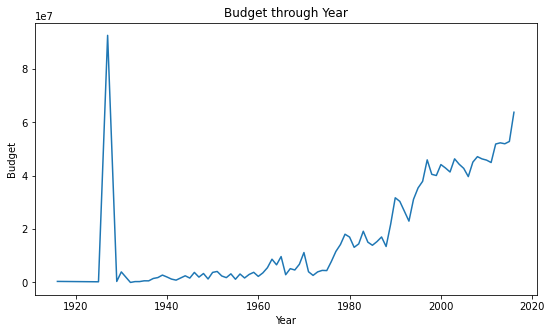

In [6]:
plt.figure(figsize=(9,5))
plt.plot(budget_by_year)
plt.title('Budget through Year')
plt.xlabel('Year')
plt.ylabel('Budget')

In [7]:
budget_by_year.idxmax()

1927

In [8]:
df.query('release_year == 1927')

,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,release_year
2212,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",de,Metropolis,32.351527,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1927-01-10,650422,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,Metropolis,1927


### CONCLUSIONS:
     1. According to the map, there is an increasing trend in budget spending through the year -> positive relationship
     2. However, there is an "outstandingly high" budget in the year 1927, which can be explained due to the fact that we are using the 'mean' of budget through that specific year. And in 1927, there is only one year in the data, which may affect.

## Research Question 2: Which movies has the most/least profit over the year?

Calculate the profit

In [9]:
df['profit'] = df['revenue'] - df['budget']
df.head()

,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,release_year,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,2009,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,2007,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,2015,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,2012,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,2012,24139100


In [10]:
max_profit = df['profit'].max()
min_profit = df['profit'].min()
print(max_profit, min_profit)

2550965087 -165710090


In [11]:
max_film = df.query('profit == {}'.format(max_profit))
max_film

,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,release_year,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,2009,2550965087


In [12]:
min_film = df.query('profit == {}'.format(min_profit))
min_film

,budget,genres,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,release_year,profit
13,255000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,The Lone Ranger,49.046956,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-07-03,89289910,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Lone Ranger,2013,-165710090


## Answer: 

The most profitable film is **Avatar** and the least is **The Lone Range**

The relationship between profit through the year:

In [13]:
profit_by_year = df.groupby('release_year')['profit'].mean()
profit_by_year

release_year
1916    8.008844e+06
1925    2.175500e+07
1927   -9.196958e+07
1929    3.979000e+06
1930    4.050000e+06
            ...     
2012    1.216450e+08
2013    9.994237e+07
2014    1.261462e+08
2015    1.329160e+08
2016    1.369144e+08
Name: profit, Length: 89, dtype: float64

Text(0, 0.5, 'Profit')

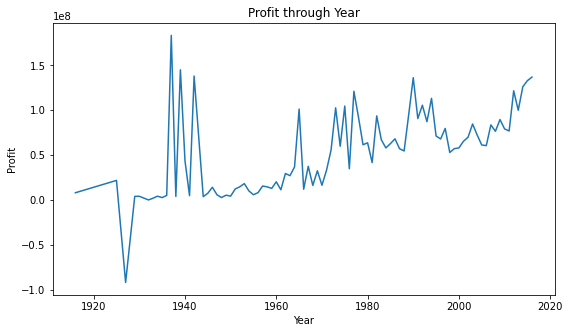

In [14]:
plt.figure(figsize=(9,5))
plt.plot(profit_by_year)
plt.title('Profit through Year')
plt.xlabel('Year')
plt.ylabel('Profit')

## Research Question 3: What is the most used genre?

In [15]:
df['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
3224                       [{"id": 35, "name": "Comedy"}]
3225    [{"id": 27, "name": "Horror"}, {"id": 35, "nam...
3226    [{"id": 80, "name": "Crime"}, {"id": 27, "name...
3227    [{"id": 878, "name": "Science Fiction"}, {"id"...
3228    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
Name: genres, Length: 3229, dtype: object

In [16]:
#Split the data in genre:
import ast

list_genre = []

for i in range(df.shape[0]):
    for j in range(len(ast.literal_eval(df['genres'].values[i]))):
        genre = ast.literal_eval(df['genres'].values[i])[j]['name']
        list_genre.append(genre)

print(len(list_genre))

8559


In [17]:
from collections import Counter

list_genre_count = pd.DataFrame({'genre': Counter(list_genre).keys(), 'genre_count': Counter(list_genre).values()})
list_genre_count.head()

,genre,genre_count
0,Action,918
1,Adventure,661
2,Fantasy,342
3,Science Fiction,431
4,Crime,521


Text(0.5, 1.0, 'Most used genres throughout the year')

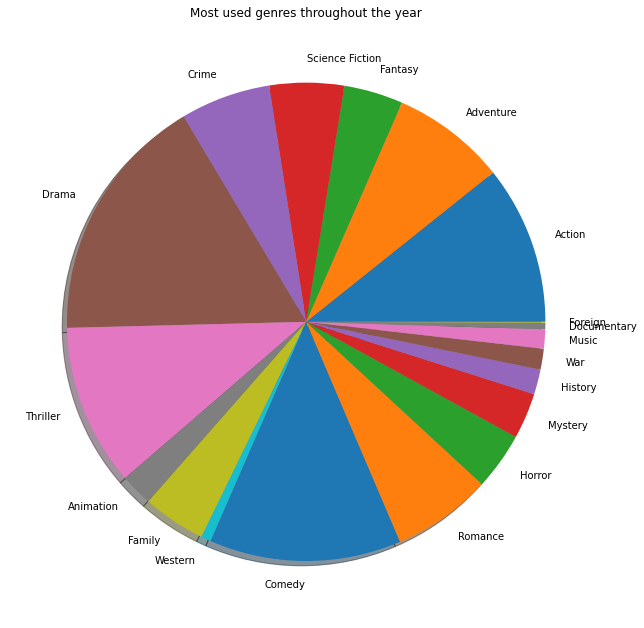

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(list_genre_count['genre_count'], labels=list_genre_count['genre'], shadow=True)
ax.set_title('Most used genres throughout the year', fontsize=12)


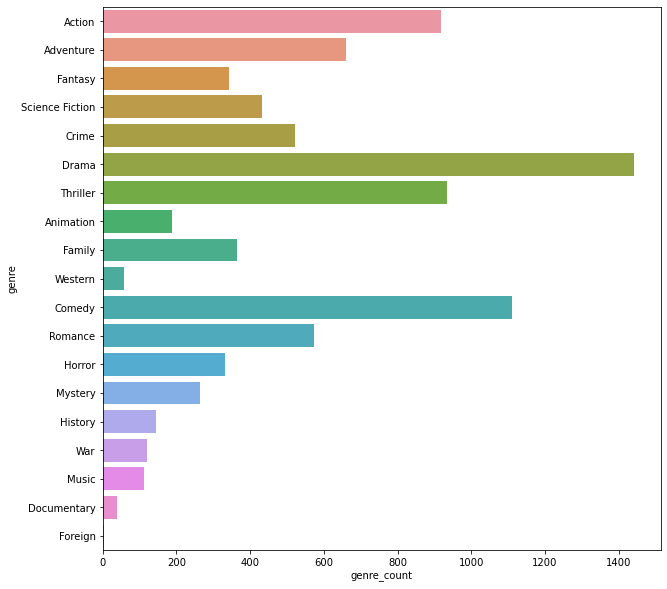

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(ax=ax, x=list_genre_count['genre_count'], y=list_genre_count['genre'])
ax.set_title('Most used genres throughout the year', fontsize=12)

### CONCLUSIONS:
     According to the map, we can conclude the genre most used is **Drama**, followed up to it is Comedy,Action, Thriller, which can be expected since these 3 genres are the most-seen during nowadays movie.

## Research Question 4: Relationship between budget and profit/revenue

**1. BUDGET - REVENUE**

<AxesSubplot:xlabel='budget', ylabel='revenue'>

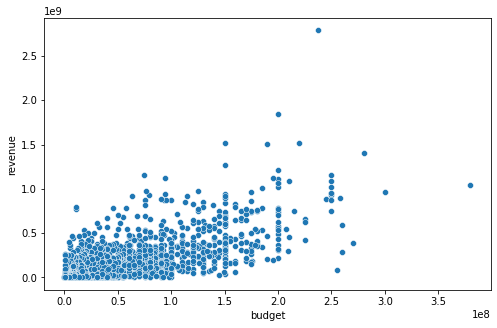

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df['budget'], y=df['revenue'], ax=ax).set_title("Budget VS Revenue",size=15)

Due to the graph, we can see a fairly positive relationship between the budget and revenue, which means with and increase in budget, there may be chances the movie fet higher revenue

**2. BUDGET - PROFIT**

Text(0.5, 1.0, 'Budget VS Profit')

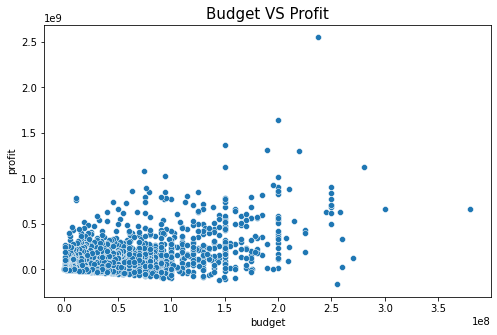

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df['budget'], y=df['profit'], ax=ax).set_title("Budget VS Profit",size=15)

Due to the graph, we can see a fairly positive relationship between the budget and profit, which means with and increase in budget, there may be chances the movie get higher profit

## Research Question 5: The average time of all the movies over the year?

In [34]:
df["runtime"].describe()

count    3229.000000
mean      110.724373
std        20.965694
min        41.000000
25%        96.000000
50%       107.000000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Runtime of all Movies')

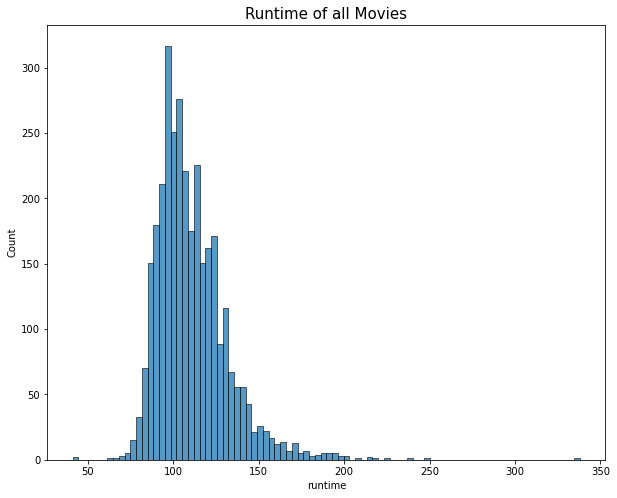

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(df['runtime'], ax=ax).set_title("Runtime of all Movies",size=15)

According to the graph and summarized data, we can conclude:

    1. The graph is skewed to the right, and there is some outliers in the data
    2. The avg runtime of all movies are around **110 mins**
    3. The movie has least runtime is **41 mins** and the longest movie is **338 mins**

## Final Conclusion:

1. The budget used in film industry has been increasing overtime. Moreover, there's a positive relationship between budget and profit/revenue, meaning more money spent on making movies, higher chances we'll get better profit/revenue.

2. Most of the movies must be made from these genre: Drama, Action, Comedy, Thriller in order to be well-received and success

3. Can take recommendation from the most profitable movie: **Avatar** and least one is **The Lone Ranger**

4. The average duration of a movie must be around **110 mins**